In [2481]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [2482]:
df = pd.read_csv('inclass-data/adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'edu', 'edu-num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'cap-gain', 'cap-loss','hpw','native country','income']
df.head()

,age,workclass,fnlwgt,edu,edu-num,marital,occupation,relationship,race,sex,cap-gain,cap-loss,hpw,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Drop useless features (columns)

In [2483]:
df = df.drop(columns=['fnlwgt', 'edu', 'cap-gain', 'cap-loss', 'native country','marital'])

In [2484]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [2485]:
df['occupation'] = df['occupation'].replace(['Armed-Forces', 'Priv-house-serv'], 'etc')

In [2486]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:ylabel='Frequency'>

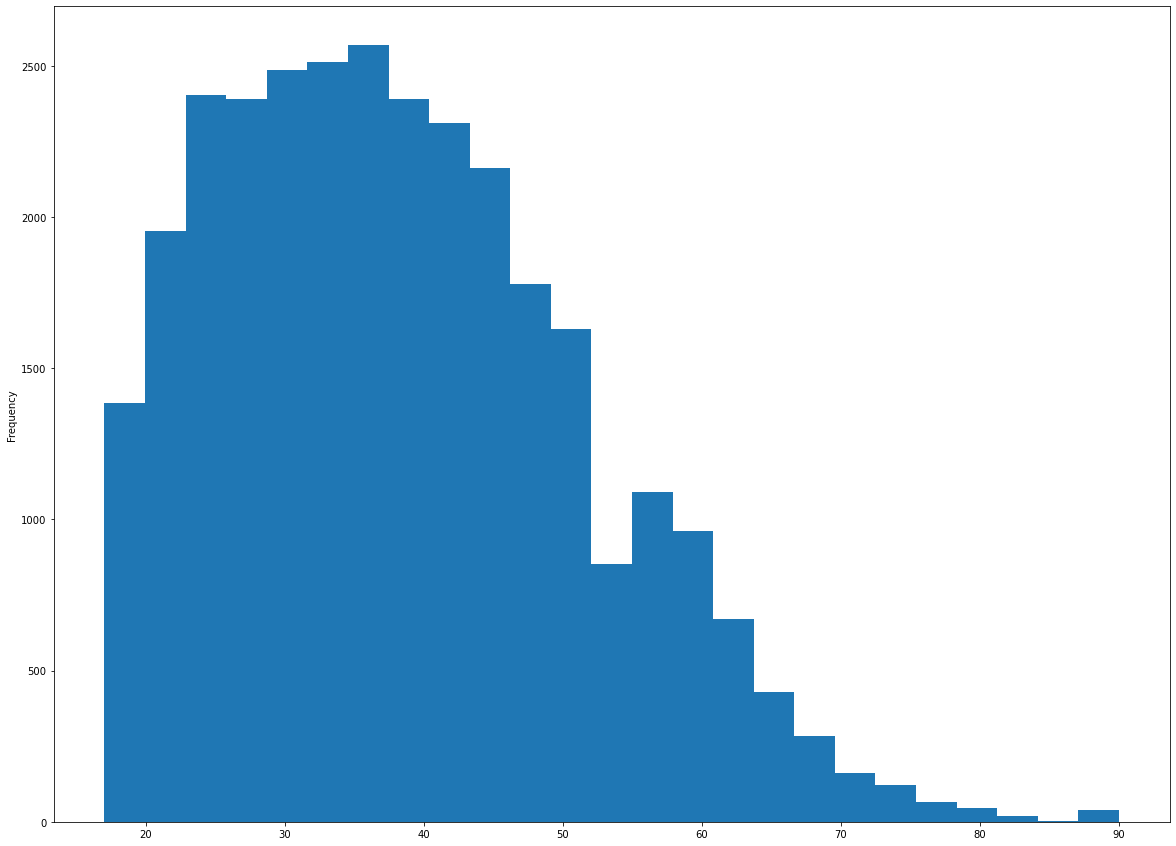

In [2506]:
df['age'].plot.hist(bins=25, figsize=(20,15))

In [2488]:
df.head()

,age,workclass,edu-num,occupation,relationship,race,sex,hpw,income
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Prof-specialty,Wife,Black,Female,40,<=50K


In [2489]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [2490]:
for i in df.columns:
    dfi_nc = df[df[i] == ' ?'].index
    df = df.drop(labels=dfi_nc)

In [2491]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [2492]:
df['income'].value_counts()

 <=50K    23068
 >50K      7650
Name: income, dtype: int64

In [2493]:
df.head()

,age,workclass,edu-num,occupation,relationship,race,sex,hpw,income
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Prof-specialty,Wife,Black,Female,40,<=50K


In [2494]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = df.iloc[:,:-1]    #Split only data
y = df.iloc[:,-1]     #Split the target out

In [2495]:
# We can one-hot encode the dataframe. This line of code will encode only categorical features automatically.
x = pd.get_dummies(x)

# We then create the feature selector. In this case, we use chi-2 algorithm and we want to choose 4 features (k=4).
selector = SelectKBest(chi2, k=5)     #This line creates the selector
x_new = selector.fit(x,y)             #This line fits the selector to the dataset, and select the features.

# Once we fit the selector, all features are selected and its indices are saved. We can create a new dataframe with those indices.
col = selector.get_support(indices=True)   #all indices are saved in col.
x_new = x.iloc[:,col]

In [2496]:
x.head()


,age,edu-num,hpw,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,40,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [2497]:
x_new.head()

,age,edu-num,hpw,relationship_ Husband,relationship_ Own-child
0,39,13,40,0,0
1,50,13,13,1,0
2,38,9,40,0,0
3,53,7,40,1,0
4,28,13,40,0,0


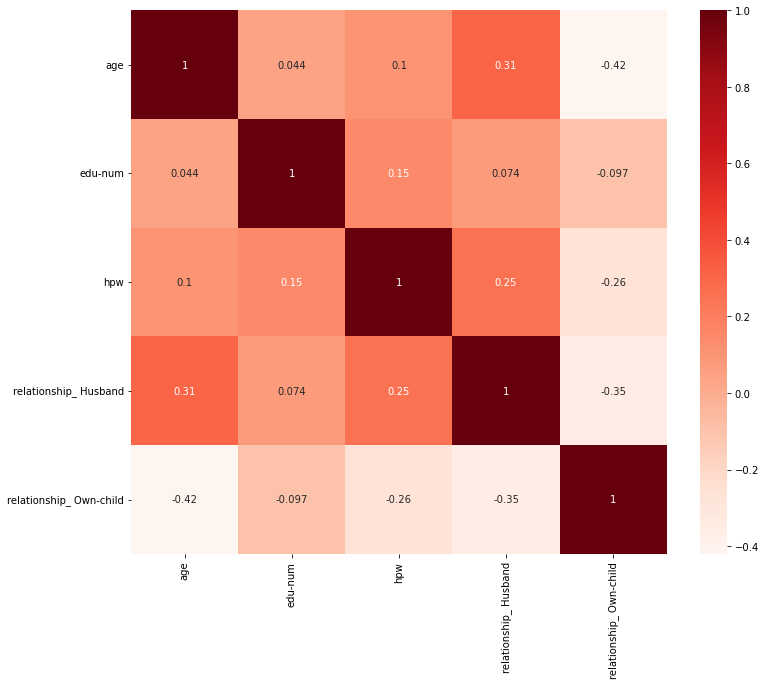

In [2498]:
plt.figure(figsize=(12,10))
cor = x_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [2499]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
xdf = min_max_scaler.fit_transform(x_new)
colname = min_max_scaler.get_feature_names_out()
xdf= pd.DataFrame(xdf, columns=colname)
xdf.head()

,age,edu-num,hpw,relationship_ Husband,relationship_ Own-child
0,0.301370,0.800000,0.397959,0.0,0.0
1,0.452055,0.800000,0.122449,1.0,0.0
2,0.287671,0.533333,0.397959,0.0,0.0
3,0.493151,0.400000,0.397959,1.0,0.0
4,0.150685,0.800000,0.397959,0.0,0.0


In [2500]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.1,random_state = 0)

In [2501]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (27646, 5)
y_train shape (27646,)
X_test shape (3072, 5)
y_test shape (3072,)


In [2502]:
#Build linear regression model
clf = LogisticRegression()
clf.fit(x_train,y_train)
# = theta0 + theta1*x _theta2*y
print("Theta0: ",clf.intercept_[0])
print("Theta1: ",clf.coef_[0][0])
print("Theta2: ",clf.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(clf.intercept_[0],clf.coef_[0][0],clf.coef_[0][1]))

Theta0:  -8.206745498843052
Theta1:  0.03052636968990314
Theta2:  0.36319277519046583
0 = -8.2067+0.0305x+0.3632y


In [2503]:
y_pred = clf.predict(x_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88     20767
        >50K       0.68      0.46      0.55      6879

    accuracy                           0.81     27646
   macro avg       0.76      0.70      0.72     27646
weighted avg       0.80      0.81      0.80     27646

Confusion matrix 
[[19261  1506]
 [ 3687  3192]]


/home/azthorax/anaconda3/envs/fra501_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


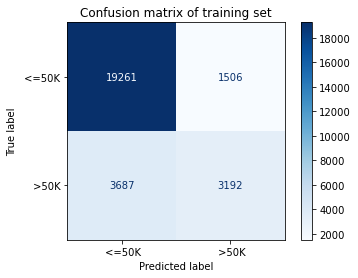

In [2504]:
# Plot confusion matrix of training set
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [2505]:
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.798
